In [2]:
###UMAP Coordinate calculations

#Loads in all required dependencies
import numpy as np
import pandas as pd
import umap
from pathlib import Path
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
import os
import time
import progressbar

#del [D1, D1_df, Day1_data, D1_u, a, b, o, p, sns_plot, fig]

working_directory = Path(os.getcwd())
print(working_directory)

#Day0-5 UMAP data set
path_data = working_directory / "classification_results_umap_AllData.csv"
full_data = pd.read_csv(path_data, header=0) #reads in data for Efficiency classification
F1 = full_data[full_data.columns[1:14]] #this subselects columns 2-14 into a new dataframe so just the numeric data will be fed into the Umap (from FADA1 to Redox Ratio)
del full_data #removes fulldata frame just in case


#next chunk of code gets the data ready for standardization and then standardizes it - this is just to make sure one variable doesn't have undue influrnce on the umap simply because it has higher values

#Determines scaling factors to make data range 0 - 1 (min value assigned 0, max value assigned 1)
std_scale = preprocessing.StandardScaler().fit(F1[['FA1',
'FA2', 'FP', 'FT1',
'FT2', 'FTM', 'NA1',
'NA2', 'NP', 'NT1',
'NT2', 'NTM','RR']])

#Transforms the numeric data with the scaling factors determined above
df_std = std_scale.transform(F1[['FA1',
'FA2', 'FP', 'FT1',
'FT2', 'FTM', 'NA1',
'NA2', 'NP', 'NT1',
'NT2', 'NTM','RR']])

y = range(np.size(df_std,0))



u = umap.UMAP(
    n_neighbors = 10, 
    min_dist = 0.3, 
    metric = 'cosine',
    n_components = 2, random_state = 42).fit_transform(df_std)

df = pd.DataFrame({'cosine1': u[:,0], 'cosine2': u[:,1]}) #this creates a dataframe with the cosine x, y coordinates
for b in ('euclidean', 'l2', 'l1', 'canberra', 'chebyshev', 'correlation'): #this loops through and creates umaps for each one of those distance metrics
    a = umap.UMAP(
   n_neighbors = 10,
  min_dist = 0.3,
    metric = b,
    n_components = 2, random_state = 42).fit_transform(df_std)
    o = b + '1' #this is so the x column will be named distance1
    p = b + '2' #y column will be named distance2
    df[o] = a[:, 0] #this adds in the x,y coordinates to the data frame
    df[p] = a[:, 1]
#Day0-5 UMAP coordinates
save_data = working_directory / "UMAPCoordinates_DifferentiationProject_AllDataMapping_revision.csv"
df.to_csv(save_data) #this saves all the x,y coordinates

del [F1, df, u, a, b, o, p]


#Day 1 high/low efficiency UMAP data set
Day1path_data = working_directory / "classification_results_umap_together_Day1Efficiency 01192021.csv"
Day1_data = pd.read_csv(Day1path_data, header=0) #reads in data for Efficiency classification

D1 = Day1_data[Day1_data.columns[1:14]] #this subselects columns 2-14 into a new dataframe so just the numeric data will be fed into the Umap (from FADA1 to Redox Ratio)


#del Day1_data #removes fulldata frame just in case

#Determines scaling factors to make data range 0 - 1 (min value assigned 0, max value assigned 1)
D1_std_scale = preprocessing.StandardScaler().fit(D1[['FA1',
'FA2', 'FP', 'FT1',
'FT2', 'FTM', 'NA1',
'NA2', 'NP', 'NT1',
'NT2', 'NTM','RR']])


#Transforms the numeric data with the scaling factors determined above
D1_df_std = D1_std_scale.transform(D1[['FA1',
'FA2', 'FP', 'FT1',
'FT2', 'FTM', 'NA1',
'NA2', 'NP', 'NT1',
'NT2', 'NTM','RR']])



D1_y = range(np.size(D1_df_std,0))



D1_u = umap.UMAP(
    n_neighbors = 10, 
    min_dist = 0.3, 
    metric = 'cosine',
    n_components = 2, random_state=123).fit_transform(D1_df_std)

D1_df = pd.DataFrame({'cosine1': D1_u[:,0], 'cosine2': D1_u[:,1]}) #this creates a dataframe with the cosine x, y coordinates
for b in ('euclidean', 'l2', 'l1', 'canberra', 'chebyshev', 'correlation'): #this loops through and creates umaps for each one of those distance metrics
    a = umap.UMAP(
    n_neighbors = 10,
    min_dist = 0.3,
    metric = b,
    n_components = 2, random_state=123).fit_transform(D1_df_std)
    o = b + '1' #this is so the x column will be named distance1
    p = b + '2' #y column will be named distance2
    D1_df[o] = a[:, 0] #this adds in the x,y coordinates to the data frame
    D1_df[p] = a[:, 1]
#Day1 efficiency UMAP coordinates
D1save_data = working_directory / "UMAPCoordinates_DifferentiationProject_Day1EfficiencyNonnormalized revised.csv"
D1_df.to_csv(D1save_data) #this saves all the x,y coordinates

#D1_df1 = pd.DataFrame(D1_df)
df_y = pd.DataFrame(Day1_data['EFFICIENCY'])
frames = [D1_df,df_y]
D1_df=pd.concat(frames, axis = 1, sort = False)
print(D1_df)

##fix this
import seaborn as sns
labels = D1_df['EFFICIENCY'] # this works if you don't delete Day1_data variable above
sns_plot = sns.scatterplot(D1_df['euclidean1'], D1_df['euclidean2'], hue=labels, alpha=0.5)
fig = sns_plot.get_figure()
fig.savefig('UMAP_Nonnormalized_Day1_efficiency revised.eps')


C:\Users\Tiffany\Documents\GitHub\cardiomyocyte_differentiation
        cosine1    cosine2  euclidean1  euclidean2       l21        l22  \
0     -0.475024   9.736314    0.579823    0.573214  0.579823   0.573214   
1     -0.539576  10.078588    0.606121   -0.821750  0.606121  -0.821750   
2     -0.391122  10.851395    0.590480   -1.745965  0.590480  -1.745965   
3      3.535825   6.858307    4.313133    4.011813  4.313133   4.011813   
4     -0.024862   9.897154    1.244496    0.780277  1.244496   0.780277   
5     -0.712475  10.467265    0.428085   -1.016118  0.428085  -1.016118   
6     -0.025821  10.777102    1.085463   -0.516002  1.085463  -0.516002   
7      0.032348  10.533357    0.780619   -0.766017  0.780619  -0.766017   
8     -0.056034  10.990548    0.864093   -1.356336  0.864093  -1.356336   
9     -0.736515  10.528104    0.580343   -0.806119  0.580343  -0.806119   
10     0.620176  10.567740    2.171271    0.076274  2.171271   0.076274   
11     0.715509   8.201370    1.7383

KeyError: 'Percentage'

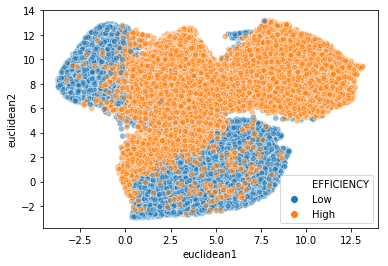

In [4]:
sns_plot = sns.scatterplot(D1_df['euclidean1'], D1_df['euclidean2'], hue=labels, alpha=0.5)
fig = sns_plot.get_figure()
fig.savefig('UMAP_Normalized_Day1_efficiency revised.eps')